In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Display the first few rows
print("DataFrame Head:")
print(df.head())

# Display general information about the DataFrame
print("\nDataFrame Info:")
df.info()

DataFrame Head:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------      

In [2]:
import numpy as np

# Convert 'Yes'/'No' columns to binary (1/0)
# Identify segmentation variables (yummy to disgusting)
segmentation_cols = df.columns[0:11]

# Create a new DataFrame for numerical segmentation data
mcdonalds_seg = df[segmentation_cols].apply(lambda x: np.where(x == 'Yes', 1, 0))

# Display the first few rows of the converted segmentation data
print("Segmentation Data (Binary):\n", mcdonalds_seg.head())

# Convert 'Like' column to numerical
# Replace 'I hate it!-5' and 'I love it!+5' with numerical values
df['Like_Numeric'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'}).astype(int)

print("\n'Like' column converted to numeric:\n", df[['Like', 'Like_Numeric']].head())

Segmentation Data (Binary):
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  

'Like' column converted to numeric:
   Like  Like_Numeric
0   -3            -3
1   +2             2
2   +1             1
3   +4             4
4   +2             2


Mean of Segmentation Variables:
 yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

Explained Variance Ratio:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]

Cumulative Explained Variance:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


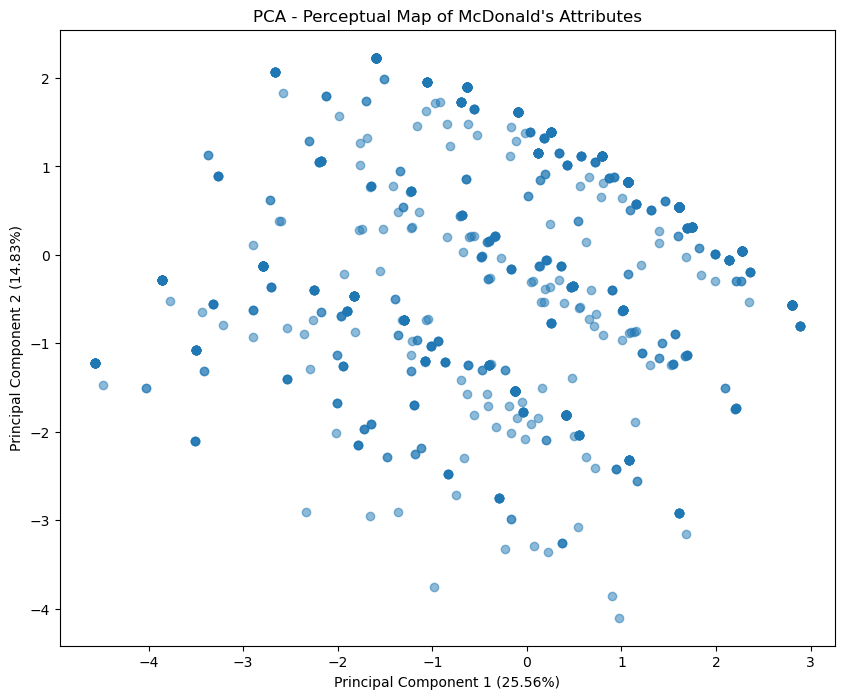

C:\Users\Hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Hp\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

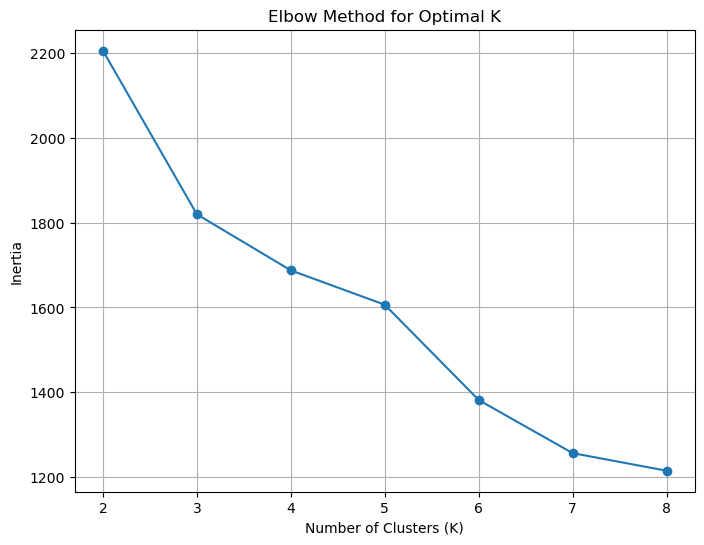

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of each segmentation variable
print("Mean of Segmentation Variables:\n", mcdonalds_seg.mean())

# Perform PCA
# Standardize the data (though for binary data, it's less critical, but good practice for PCA)
scaler = StandardScaler()
mcdonalds_scaled = scaler.fit_transform(mcdonalds_seg)

pca = PCA()
mcdonalds_pca = pca.fit_transform(mcdonalds_scaled)

# Explained variance ratio
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance:\n", cumulative_explained_variance)

# Plotting PCA results (Perceptual Map)
plt.figure(figsize=(10, 8))
plt.scatter(mcdonalds_pca[:, 0], mcdonalds_pca[:, 1], alpha=0.5)
plt.title('PCA - Perceptual Map of McDonald\'s Attributes')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.show()

# Plotting the attribute vectors on the PCA map
# This helps in interpreting the components
for i, col in enumerate(segmentation_cols):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.8, head_width=0.05)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, col, color='g', ha='center', va='center')

plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.savefig('mcdonalds_pca_perceptual_map.png')
plt.close()

# Determine optimal number of clusters using Elbow method (Inertia)
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 9): # Test k from 2 to 8, as 3-6 is suggested in the PDF
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(mcdonalds_seg)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(range(2,9))
plt.savefig('elbow_method_inertia.png')
plt.show()
plt.close()


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Perform K-means clustering with 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df['cluster_label'] = kmeans.fit_predict(mcdonalds_seg)

print(f"\nNumber of data points per cluster (K={n_clusters}):")
print(df['cluster_label'].value_counts().sort_index())

# Profile segments based on segmentation variables (mean of binary attributes)
cluster_means = df.groupby('cluster_label')[segmentation_cols].mean()
print(f"\nMean of segmentation variables per cluster (K={n_clusters}):\n", cluster_means)

# Plotting the segment profiles for segmentation variables
cluster_means.T.plot(kind='bar', figsize=(12, 7))
plt.title(f'Mean Perception of McDonald\'s Attributes by Cluster (K={n_clusters})')
plt.xlabel('Attribute')
plt.ylabel('Proportion (Yes)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig(f'segment_profile_perception_k{n_clusters}.png')
plt.close()

# Describe segments based on descriptor variables
# Mean Age per cluster
print(f"\nMean Age per cluster (K={n_clusters}):\n", df.groupby('cluster_label')['Age'].mean())

# Mean Like_Numeric per cluster
print(f"\nMean Like_Numeric per cluster (K={n_clusters}):\n", df.groupby('cluster_label')['Like_Numeric'].mean())

# Calculate gender distribution per cluster
gender_dist = df.groupby(['cluster_label', 'Gender']).size().unstack(fill_value=0)
gender_proportion = gender_dist.apply(lambda x: x / x.sum(), axis=1)  # Renamed from 'portion' to 'gender_proportion'
print(f"\nGender distribution per cluster (Proportion, K={n_clusters}):\n", gender_proportion)

# VisitFrequency distribution per cluster
visit_freq_dist = df.groupby(['cluster_label', 'VisitFrequency']).size().unstack(fill_value=0)
visit_freq_proportion = visit_freq_dist.apply(lambda x: x / x.sum(), axis=1)
print(f"\nVisit Frequency distribution per cluster (Proportion, K={n_clusters}):\n", visit_freq_proportion)

# Plotting Age distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_label', y='Age', data=df)
plt.title(f'Age Distribution by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.savefig(f'segment_profile_age_k{n_clusters}.png')
plt.close()

# Plotting Like_Numeric distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_label', y='Like_Numeric', data=df)
plt.title(f'Like Rating Distribution by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Like Rating (-5 to +5)')
plt.savefig(f'segment_profile_like_k{n_clusters}.png')
plt.close()

# Plotting Gender distribution per cluster
gender_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Gender Proportion by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig(f'segment_profile_gender_k{n_clusters}.png')
plt.close()

# Plotting VisitFrequency distribution per cluster
visit_freq_proportion.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title(f'Visit Frequency Proportion by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visit Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'segment_profile_visit_frequency_k{n_clusters}.png')
plt.close()

# Save the DataFrame with cluster labels to a CSV file
df.to_csv('mcdonalds_segmented.csv', index=False)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of data points per cluster (K=4):
cluster_label
0    197
1    601
2    345
3    310
Name: count, dtype: int64


TypeError: agg function failed [how->mean,dtype->object]

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of data points per cluster (K=4):
cluster_label
0    197
1    601
2    345
3    310
Name: count, dtype: int64

Mean of segmentation variables per cluster (K=4):
                   yummy  convenient     spicy  fattening    greasy      fast  \
cluster_label                                                                  
0              0.822335    0.969543  0.065990   0.756345  0.065990  0.868020   
1              0.856905    0.985025  0.109817   0.833611  0.440932  0.961730   
2              0.359420    0.794203  0.104348   0.953623  0.855072  0.788406   
3              0.006452    0.845161  0.067742   0.906452  0.619355  0.925806   

                  cheap     tasty  expensive   healthy  disgusting  
cluster_label                                                       
0              0.050761  0.908629   0.771574  0.365482    0.020305  
1              0.970050  0.975042   0.039933  0.304493    0.053245  
2              0.040580  0.437681   0.947826  0.028986    0.484058  
3   

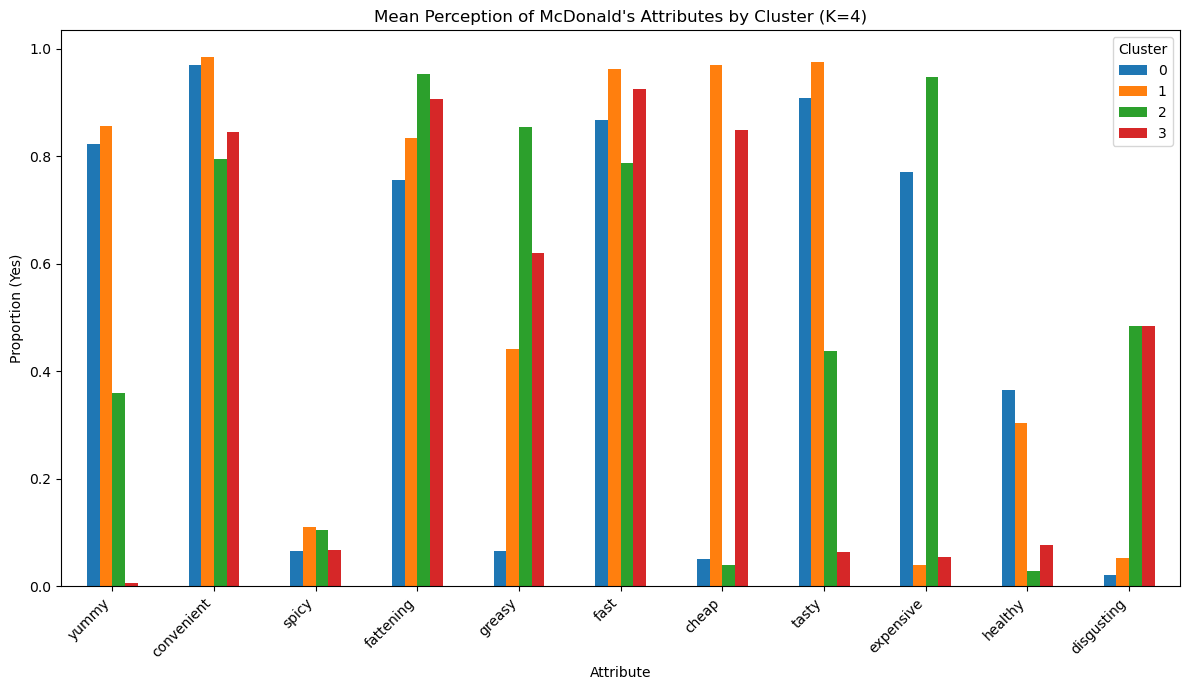


Mean Age per cluster (K=4):
 cluster_label
0    43.949239
1    43.164725
2    43.585507
3    48.948387
Name: Age, dtype: float64

Mean Like_Numeric per cluster (K=4):
 cluster_label
0    2.593909
1    2.522463
2   -0.881159
3   -1.916129
Name: Like_Numeric, dtype: float64

Gender distribution per cluster (Proportion, K=4):
 Gender           Female      Male
cluster_label                    
0              0.492386  0.507614
1              0.594010  0.405990
2              0.452174  0.547826
3              0.574194  0.425806

Visit Frequency distribution per cluster (Proportion, K=4):
 VisitFrequency  Every three months  More than once a week     Never  \
cluster_label                                                         
0                         0.233503               0.050761  0.005076   
1                         0.212978               0.058236  0.016639   
2                         0.266667               0.023188  0.147826   
3                         0.245161               0.0

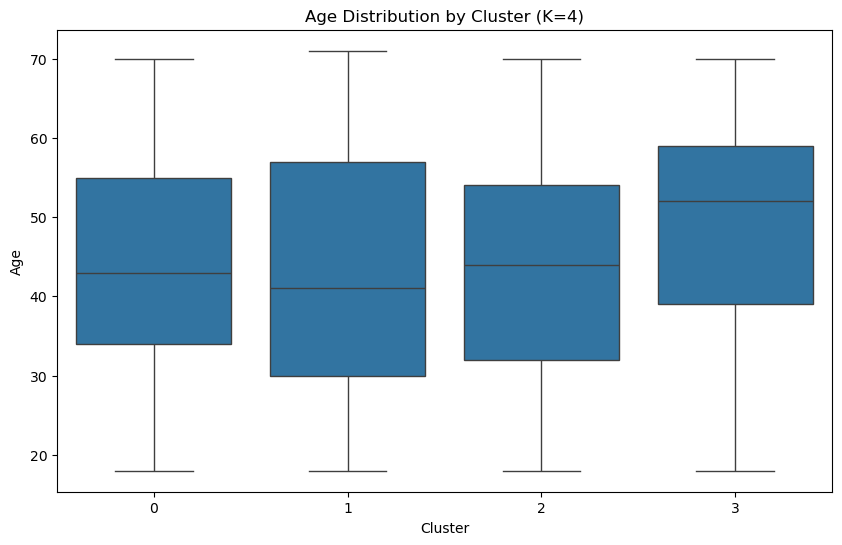

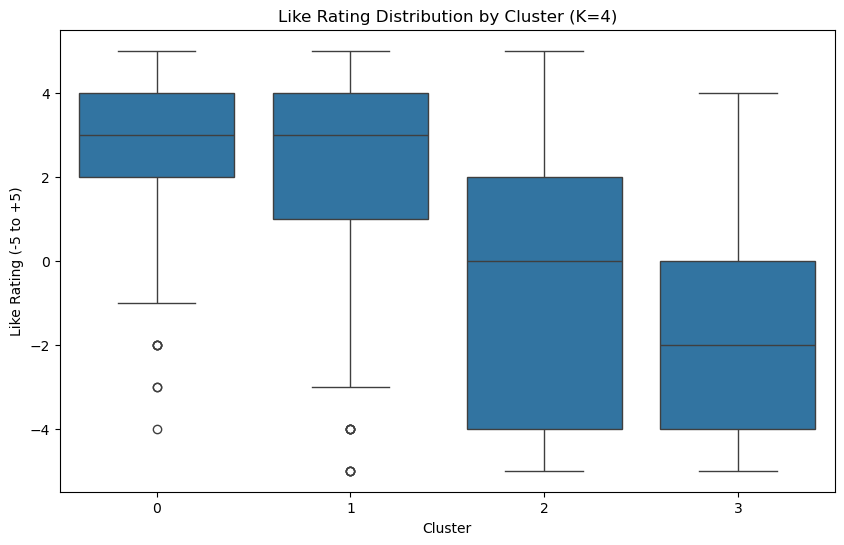

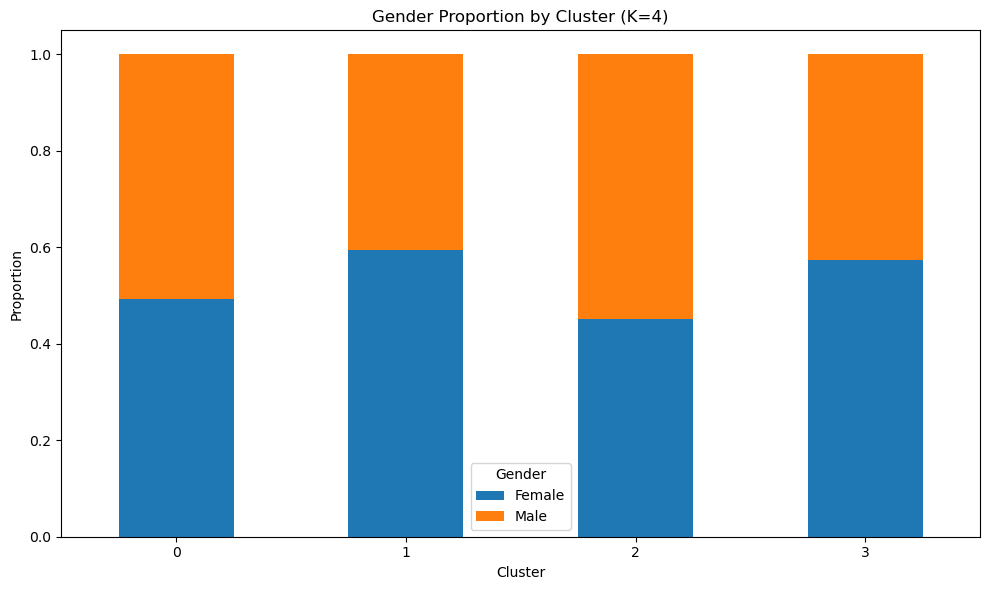

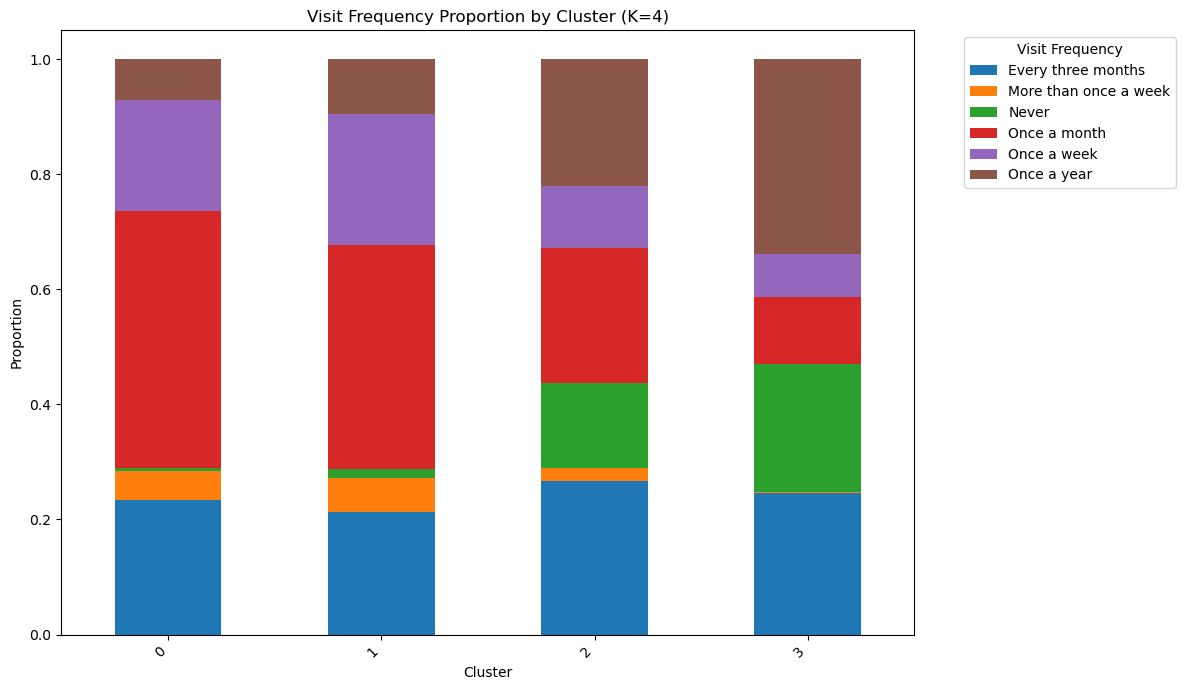

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df and mcdonalds_seg are already prepared from previous steps
# (i.e., mcdonalds_seg contains binary 0/1 for segmentation_cols)

# Define segmentation columns again (in case of a fresh run)
segmentation_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Convert 'Yes'/'No' columns to binary (1/0)
# (Re-executing this for robustness if running from here directly)
for col in segmentation_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Create mcdonalds_seg DataFrame (using .copy() to avoid SettingWithCopyWarning)
mcdonalds_seg = df[segmentation_cols].copy()

# Convert 'Like' column to numerical (re-executing for robustness)
df['Like_Numeric'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'}).astype(int)


# Perform K-means clustering with 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df['cluster_label'] = kmeans.fit_predict(mcdonalds_seg)

print(f"\nNumber of data points per cluster (K={n_clusters}):")
print(df['cluster_label'].value_counts().sort_index())

# Profile segments based on segmentation variables (mean of binary attributes)
# Explicitly select numeric columns for mean calculation
cluster_means = df.groupby('cluster_label')[segmentation_cols].mean()
print(f"\nMean of segmentation variables per cluster (K={n_clusters}):\n", cluster_means)

# Plotting the segment profiles for segmentation variables
# Ensure the index (cluster_label) is part of the plot if needed
# Transpose for plotting attributes on x-axis and clusters as bars
ax = cluster_means.T.plot(kind='bar', figsize=(12, 7))
ax.set_title(f'Mean Perception of McDonald\'s Attributes by Cluster (K={n_clusters})')
ax.set_xlabel('Attribute')
ax.set_ylabel('Proportion (Yes)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig(f'segment_profile_perception_k{n_clusters}.png')
plt.show()
plt.close()

# Describe segments based on descriptor variables
# Mean Age per cluster
print(f"\nMean Age per cluster (K={n_clusters}):\n", df.groupby('cluster_label')['Age'].mean())

# Mean Like_Numeric per cluster
print(f"\nMean Like_Numeric per cluster (K={n_clusters}):\n", df.groupby('cluster_label')['Like_Numeric'].mean())

# Gender distribution per cluster
gender_dist = df.groupby(['cluster_label', 'Gender']).size().unstack(fill_value=0)
gender_proportion = gender_dist.apply(lambda x: x / x.sum(), axis=1)
print(f"\nGender distribution per cluster (Proportion, K={n_clusters}):\n", gender_proportion)

# VisitFrequency distribution per cluster
visit_freq_dist = df.groupby(['cluster_label', 'VisitFrequency']).size().unstack(fill_value=0)
visit_freq_proportion = visit_freq_dist.apply(lambda x: x / x.sum(), axis=1)
print(f"\nVisit Frequency distribution per cluster (Proportion, K={n_clusters}):\n", visit_freq_proportion)

# Plotting Age distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_label', y='Age', data=df)
plt.title(f'Age Distribution by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.savefig(f'segment_profile_age_k{n_clusters}.png')
plt.show()
plt.close()

# Plotting Like_Numeric distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_label', y='Like_Numeric', data=df)
plt.title(f'Like Rating Distribution by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Like Rating (-5 to +5)')
plt.savefig(f'segment_profile_like_k{n_clusters}.png')
plt.show()
plt.close()

# Plotting Gender distribution per cluster
gender_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Gender Proportion by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig(f'segment_profile_gender_k{n_clusters}.png')
plt.show()
plt.close()

# Plotting VisitFrequency distribution per cluster
visit_freq_proportion.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title(f'Visit Frequency Proportion by Cluster (K={n_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visit Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'segment_profile_visit_frequency_k{n_clusters}.png')
plt.show()
plt.close()

# Save the DataFrame with cluster labels to a CSV file
df.to_csv('mcdonalds_segmented.csv', index=False)